In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time


In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# 1. 웹 드라이버 설정
driver = webdriver.Chrome()  # 크롬 드라이버 경로를 추가하거나 PATH에 등록 필요
url = "https://emart.ssg.com/item/itemView.ssg?itemId=1000053060578&siteNo=6002&salestrNo=2154"
driver.get(url)

# 2. 별점 수집 함수
def get_stars_on_page():
    stars = []
    try:
        # 페이지에 있는 10개의 리뷰에서 별점을 추출
        for i in range(1, 11):
            xpath = f"/html/body/div[5]/div[5]/div/div[2]/div[5]/div[1]/div/div[2]/div[3]/div[2]/section[2]/div/div[2]/ul/li[{i}]/div[1]/a/div/div[1]/div[1]/span/span/em"
            star_element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, xpath)))
            stars.append(star_element.text)
    except Exception as e:
        print(f"Error retrieving stars on page: {e}")
    return stars

# 3. 다음 페이지 버튼 클릭 함수
def go_to_next_page():
    try:
        next_button_xpath = "/html/body/div[5]/div[5]/div/div[2]/div[5]/div[1]/div/div[2]/div[3]/div[2]/section[2]/div/div[3]/a[2]"
        next_button = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, next_button_xpath)))
        next_button.click()
        time.sleep(2)  # 페이지가 로드될 시간을 기다림
    except Exception as e:
        print("No more pages or error navigating to the next page:", e)
        return False
    return True

# 4. 모든 페이지에서 리뷰 수집
all_stars = []
current_page = 1
total_pages = 464

while current_page <= total_pages:
    print(f"Scraping page {current_page}...")
    stars = get_stars_on_page()
    all_stars.extend(stars)
    
    if current_page < total_pages:
        if not go_to_next_page():  # 다음 페이지로 이동 실패 시 종료
            break
    current_page += 1

# 5. 결과 출력
print("Collected stars:", len(all_stars), "reviews")
driver.quit()




Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [17]:
import csv

# CSV 파일로 저장
with open("stars.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Star"])  # 헤더 추가
    writer.writerows([[star] for star in all_stars])  # 별점 데이터를 행 단위로 저장

print("Stars saved to 'stars.csv'")

Stars saved to 'stars.csv'


In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# 1. 웹 드라이버 설정
driver = webdriver.Chrome()  # 크롬 드라이버 경로를 추가하거나 PATH에 등록 필요
url = "https://emart.ssg.com/item/itemView.ssg?itemId=1000053060578&siteNo=6002&salestrNo=2154"
driver.get(url)

# 2. 코멘트 수집 함수
def get_comments_on_page():
    comments = []
    try:
        # 페이지에 있는 10개의 리뷰에서 코멘트를 추출
        for i in range(1, 11):
            xpath = f"/html/body/div[5]/div[5]/div/div[2]/div[5]/div[1]/div/div[2]/div[3]/div[2]/section[2]/div/div[2]/ul/li[{i}]/div[1]/a/div/div[3]/p"
            comment_element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, xpath)))
            comments.append(comment_element.text)
    except Exception as e:
        print(f"Error retrieving comments on page: {e}")
    return comments

# 3. 다음 페이지 버튼 클릭 함수
def go_to_next_page():
    try:
        next_button_xpath = "/html/body/div[5]/div[5]/div/div[2]/div[5]/div[1]/div/div[2]/div[3]/div[2]/section[2]/div/div[3]/a[2]"
        next_button = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, next_button_xpath)))
        next_button.click()
        time.sleep(2)  # 페이지가 로드될 시간을 기다림
    except Exception as e:
        print("No more pages or error navigating to the next page:", e)
        return False
    return True

# 4. 모든 페이지에서 코멘트 수집
all_comments = []
current_page = 1
total_pages = 464

while current_page <= total_pages:
    print(f"Scraping page {current_page}...")
    comments = get_comments_on_page()
    all_comments.extend(comments)
    
    if current_page < total_pages:
        if not go_to_next_page():  # 다음 페이지로 이동 실패 시 종료
            break
    current_page += 1

# 5. CSV 파일로 저장
with open("comments.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Comment"])  # 헤더 추가
    writer.writerows([[comment] for comment in all_comments])  # 코멘트를 행 단위로 저장

print("Comments saved to 'comments.csv'")

# 드라이버 종료
driver.quit()


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [19]:
pip install wordcloud matplotlib pandas


Note: you may need to restart the kernel to use updated packages.


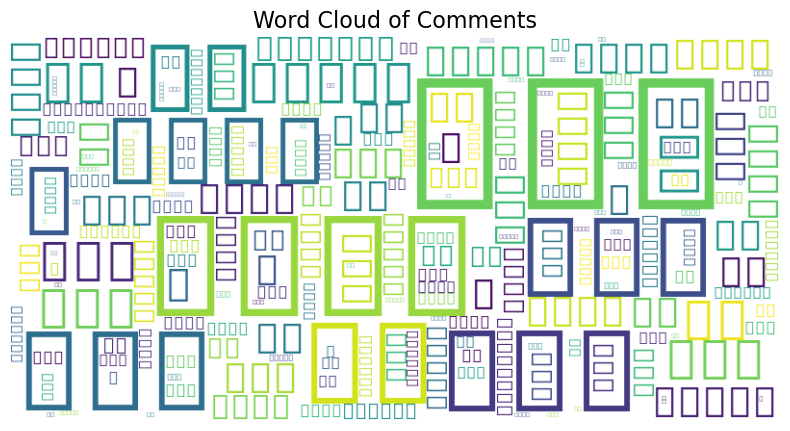

In [22]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 코멘트 데이터 불러오기
comments_file = "comments.csv"  # CSV 파일 경로
comments_data = pd.read_csv(comments_file)

# 2. 텍스트 데이터 전처리
# 'Comment' 열의 텍스트를 모두 결합
all_comments = " ".join(comment for comment in comments_data["Comment"] if isinstance(comment, str))

# 3. 워드클라우드 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    font_path=None,  # 한글 사용 시 폰트 경로 지정 필요
    collocations=False
).generate(all_comments)

# 4. 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Comments", fontsize=16)
plt.show()


In [23]:
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows의 맑은 고딕 폰트 경로
# WordCloud 생성 시 font_path 추가
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    font_path=font_path, 
    collocations=False
).generate(all_comments)


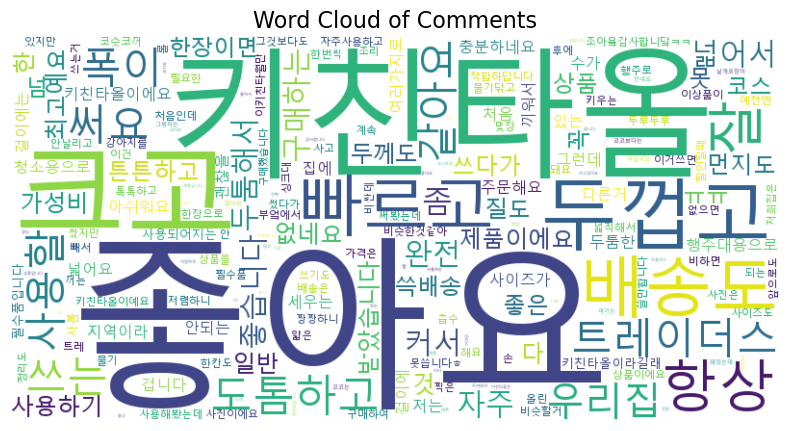

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 코멘트 데이터 불러오기
comments_file = "comments.csv"  # CSV 파일 경로
comments_data = pd.read_csv(comments_file)

# 2. 텍스트 데이터 전처리
# 'Comment' 열의 텍스트를 모두 결합
all_comments = " ".join(comment for comment in comments_data["Comment"] if isinstance(comment, str))

# 3. 워드클라우드 생성
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color="white", 
    font_path="C:/Windows/Fonts/malgun.ttf" ,  # 한글 사용 시 폰트 경로 지정 필요
    collocations=False
).generate(all_comments)

# 4. 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Comments", fontsize=16)
plt.show()


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import csv

# WebDriver 설정 (ChromeDriver 경로 입력)
driver_path = "path/to/chromedriver"
driver = webdriver.Chrome(executable_path=driver_path)

# 타겟 URL 설정
base_url = "https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage={}&cntPerPage=10&pageSize=10"

# CSV 파일 생성 및 헤더 작성
output_file = "disaster_alerts.csv"
with open(output_file, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title", "Link", "Content"])  # 컬럼 헤더

# 전체 페이지 크롤링
try:
    for page in range(1, 2185):  # 1부터 2184까지 페이지 반복
        # 페이지 URL로 이동
        driver.get(base_url.format(page))
        time.sleep(2)  # 페이지 로딩 대기
        
        # 각 페이지에서 10개의 재난문자 추출
        for row in range(1, 11):  # 1번 ~ 10번 행
            try:
                # 제목과 상세 링크 추출
                title_xpath = f"/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr[{row}]/td[2]/a"
                link_element = driver.find_element(By.XPATH, title_xpath)
                title = link_element.text
                link = link_element.get_attribute("href")
                
                # 상세 페이지 이동 후 내용 추출
                driver.execute_script("window.open(arguments[0], '_blank');", link)
                driver.switch_to.window(driver.window_handles[1])  # 새 탭으로 전환
                time.sleep(2)  # 상세 페이지 로딩 대기
                
                # 재난문자 내용 크롤링
                content_xpath = "/html/body/div[1]/div[3]/form/div[3]/div[2]/div/div"  # 실제 내용의 XPATH로 수정 필요
                content = driver.find_element(By.XPATH, content_xpath).text
                
                # 데이터를 CSV에 저장
                with open(output_file, mode="a", newline="", encoding="utf-8") as file:
                    writer = csv.writer(file)
                    writer.writerow([title, link, content])
                
                # 상세 페이지 닫고 원래 페이지로 복귀
                driver.close()
                driver.switch_to.window(driver.window_handles[0])
            
            except Exception as e:
                print(f"Row {row} on page {page} failed: {e}")
                continue

        # 다음 페이지로 이동
        print(f"Page {page} completed.")
    
finally:
    # 브라우저 닫기
    driver.quit()


TypeError: WebDriver.__init__() got an unexpected keyword argument 'executable_path'

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# 1. 웹 드라이버 설정
driver = webdriver.Chrome()  # 크롬 드라이버 경로를 추가하거나 PATH에 등록 필요
url = "https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10"
driver.get(url)

# 2. 코멘트 수집 함수
def get_comments_on_page():
    comments = []
    try:
        # 페이지에 있는 10개의 리뷰에서 코멘트를 추출
        for i in range(1, 11):
            xpath = f"/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr[{i}]/td[2]/a"
            comment_element = WebDriverWait(driver, 3).until(EC.presence_of_element_located((By.XPATH, xpath)))
            comments.append(comment_element.text)
    except Exception as e:
        print(f"Error retrieving comments on page: {e}")
    return comments

# 3. 다음 페이지 버튼 클릭 함수
def go_to_next_page():
    try:
        next_button_xpath = "/html/body/div[5]/div[5]/div/div[2]/div[5]/div[1]/div/div[2]/div[3]/div[2]/section[2]/div/div[3]/a[2]"
        next_button = WebDriverWait(driver, 3).until(EC.element_to_be_clickable((By.XPATH, next_button_xpath)))
        next_button.click()
        time.sleep(2)  # 페이지가 로드될 시간을 기다림
    except Exception as e:
        print("No more pages or error navigating to the next page:", e)
        return False
    return True

# 4. 모든 페이지에서 코멘트 수집
all_comments = []
current_page = 1
total_pages = 464

while current_page <= total_pages:
    print(f"Scraping page {current_page}...")
    comments = get_comments_on_page()
    all_comments.extend(comments)
    
    if current_page < total_pages:
        if not go_to_next_page():  # 다음 페이지로 이동 실패 시 종료
            break
    current_page += 1

# 5. CSV 파일로 저장
with open("comments.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Comment"])  # 헤더 추가
    writer.writerows([[comment] for comment in all_comments])  # 코멘트를 행 단위로 저장

print("Comments saved to 'comments.csv'")

# 드라이버 종료
driver.quit()

/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr[1]/td[2]/a
/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr[2]/td[2]/a
/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr[1]/td[2]/a

/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[4]/a
/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[5]/a

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

# 웹 드라이버 초기화 (Chrome 예시)
driver = webdriver.Chrome()  # chromedriver가 PATH에 있어야 함.
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 페이지 수 설정
total_pages = 2184

try:
    for page in range(1, total_pages + 1):
        print(f"Scraping page {page} of {total_pages}...")
        
        # 현재 페이지의 테이블 데이터 가져오기
        rows = driver.find_elements(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr")
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            date = row.find_element(By.XPATH, "./td[3]").text     # 날짜
            link = row.find_element(By.XPATH, "./td[2]/a").get_attribute("href")  # 상세 페이지 링크
            data.append({"Title": title, "Date": date, "Link": link})
        
        # 다음 페이지로 이동
        if page % 10 == 0:  # 10페이지마다 "다음" 버튼 클릭
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
        else:  # 그 외에는 특정 페이지 번호 클릭
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{4 + page % 10}]/a")
        next_button.click()
        
        # 페이지 로드 대기
        time.sleep(2)

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications.csv", index=False, encoding="utf-8-sig")
    print("Data saved to 'disaster_notifications.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping page 1 of 2184...
Scraping page 2 of 2184...
Scraping page 3 of 2184...
Scraping page 4 of 2184...
Scraping page 5 of 2184...
Scraping page 6 of 2184...
Scraping page 7 of 2184...
Scraping page 8 of 2184...
Scraping page 9 of 2184...
Scraping page 10 of 2184...
Scraping page 11 of 2184...
Scraping page 12 of 2184...
Scraping page 13 of 2184...
Scraping page 14 of 2184...
Scraping page 15 of 2184...
Scraping page 16 of 2184...
Scraping page 17 of 2184...
Scraping page 18 of 2184...
Scraping page 19 of 2184...
Scraping page 20 of 2184...
Scraping page 21 of 2184...
Scraping page 22 of 2184...
Scraping page 23 of 2184...
Scraping page 24 of 2184...
Scraping page 25 of 2184...
Scraping page 26 of 2184...
Scraping page 27 of 2184...
Scraping page 28 of 2184...
Scraping page 29 of 2184...
Scraping page 30 of 2184...
Scraping page 31 of 2184...
Scraping page 32 of 2184...
Scraping page 33 of 2184...
Scraping page 34 of 2184...
Scraping page 35 of 2184...
Scraping page 36 of 2184...
S

KeyboardInterrupt: 

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome()  # chromedriver 경로 설정 필요
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 총 페이지 수 설정
total_pages = 2184
current_page = 3  # 시작 페이지 (li[3]/a부터 시작)

try:
    while current_page <= total_pages:
        print(f"Scraping page {current_page}...")
        
        # 현재 페이지 데이터 수집
        rows = driver.find_elements(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr")
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            date = row.find_element(By.XPATH, "./td[3]").text     # 날짜
            link = row.find_element(By.XPATH, "./td[2]/a").get_attribute("href")  # 상세 페이지 링크
            data.append({"Title": title, "Date": date, "Link": link})
        
        # 다음 페이지로 이동
        if current_page % 10 == 0:  # "다음" 버튼 클릭 (li[13]/a)
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
            next_button.click()
            current_page += 1
            
            # "다음" 클릭 후 li[3]/a부터 다시 시작
            time.sleep(2)  # 페이지 로드 대기
            for _ in range(2):  # li[3]까지 이동
                next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[3]/a")
                next_button.click()
                time.sleep(2)
        else:  # 일반적인 페이지 이동 (li[4] ~ li[12])
            next_button_index = current_page % 10 + 3  # li[4] ~ li[12] 순서
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{next_button_index}]/a")
            next_button.click()
            current_page += 1
        
        # 페이지 로드 대기
        time.sleep(2)

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications.csv", index=False, encoding="utf-8-sig")
    print("Data saved to 'disaster_notifications.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Data saved to 'disaster_notifications.csv'.


KeyboardInterrupt: 

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome()  # ChromeDriver 경로 설정 필요
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 시작 페이지
current_page = 3  # li[3]/a에서 시작

# 총 페이지 수
total_pages = 2184

try:
    while current_page <= total_pages:
        print(f"Scraping page {current_page}...")

        # 현재 페이지 데이터 수집
        rows = driver.find_elements(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr")
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            date = row.find_element(By.XPATH, "./td[3]").text     # 날짜
            link = row.find_element(By.XPATH, "./td[2]/a").get_attribute("href")  # 상세 페이지 링크
            data.append({"Title": title, "Date": date, "Link": link})

        # 페이지 이동 로직
        if current_page % 10 == 0:  # 10번째 페이지일 경우 "다음" 클릭
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
            next_button.click()
            time.sleep(2)  # 로드 대기
            current_page += 1
        else:
            # 다음 페이지 버튼 클릭
            button_index = 3 + (current_page % 10)  # li[3] ~ li[12] 동적으로 계산
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{button_index}]/a")
            next_button.click()
            time.sleep(2)  # 로드 대기
            current_page += 1

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications.csv", index=False, encoding="utf-8-sig")
    print("Data saved to 'disaster_notifications.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Data saved to 'disaster_notifications.csv'.


KeyboardInterrupt: 

In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome()
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 총 페이지 수 설정
total_pages = 30
relative_page = 3  # 시작 페이지 li[3]/a

try:
    while relative_page <= total_pages:
        print(f"Scraping relative page {relative_page}...")

        # 현재 페이지의 테이블 데이터 가져오기
        rows = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr"))
        )
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            date = row.find_element(By.XPATH, "./td[3]").text     # 날짜
            link = row.find_element(By.XPATH, "./td[2]/a").get_attribute("href")  # 상세 페이지 링크
            data.append({"Title": title, "Date": date, "Link": link})

        # 페이지 이동 로직
        if relative_page == 12:  # li[13]/a: "다음" 버튼 클릭 후 li[3]/a로 초기화
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
            next_button.click()
            time.sleep(2)
            relative_page = 3  # "다음" 클릭 후 li[3]/a로 돌아감
        else:  # 일반 페이지 (li[4] ~ li[12])
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{relative_page + 1}]/a")
            next_button.click()
            time.sleep(2)
            relative_page += 1

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications.csv", index=False, encoding="utf-8-sig")
    print("Data saved to 'disaster_notifications.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping relative page 3...
Scraping relative page 4...
Scraping relative page 5...
Scraping relative page 6...
Scraping relative page 7...
Scraping relative page 8...
Scraping relative page 9...
Scraping relative page 10...
Scraping relative page 11...
Scraping relative page 12...
Scraping relative page 3...
Scraping relative page 4...
Scraping relative page 5...
Scraping relative page 6...
Scraping relative page 7...
Scraping relative page 8...
Scraping relative page 9...
Scraping relative page 10...
Scraping relative page 11...
Scraping relative page 12...
Scraping relative page 3...
Scraping relative page 4...
Scraping relative page 5...
Scraping relative page 6...
Scraping relative page 7...
Scraping relative page 8...
Scraping relative page 9...
Scraping relative page 10...
Scraping relative page 11...
Scraping relative page 12...
Scraping relative page 3...
Scraping relative page 4...
Scraping relative page 5...
Scraping relative page 6...
Scraping relative page 7...
Scraping re

KeyboardInterrupt: 

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome()
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 페이지 수 설정
total_pages = 30  # 최대 크롤링 페이지 수
current_page = 1  # 크롤링 시작 페이지
relative_page = 3  # li[3]/a부터 시작

try:
    while current_page <= total_pages:
        print(f"Scraping page {current_page} of {total_pages}...")

        # 현재 페이지의 테이블 데이터 가져오기
        rows = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr"))
        )
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            date = row.find_element(By.XPATH, "./td[3]").text     # 날짜
            link = row.find_element(By.XPATH, "./td[2]/a").get_attribute("href")  # 상세 페이지 링크
            data.append({"Title": title, "Date": date, "Link": link})

        # 페이지 이동 로직
        if relative_page == 12:  # li[13]/a: "다음" 버튼 클릭 후 li[3]/a로 초기화
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
            next_button.click()
            time.sleep(2)
            relative_page = 3  # "다음" 클릭 후 li[3]/a로 초기화
        else:  # 일반 페이지 이동 (li[4] ~ li[12])
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{relative_page + 1}]/a")
            next_button.click()
            time.sleep(2)
            relative_page += 1

        # 전체 페이지 수 증가
        current_page += 1

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications.csv", index=False, encoding="utf-8-sig")
    print("Data saved to 'disaster_notifications.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping page 1 of 30...
Scraping page 2 of 30...
Scraping page 3 of 30...
Scraping page 4 of 30...
Scraping page 5 of 30...
Scraping page 6 of 30...
Scraping page 7 of 30...
Scraping page 8 of 30...
Scraping page 9 of 30...
Scraping page 10 of 30...
Scraping page 11 of 30...
Scraping page 12 of 30...
Scraping page 13 of 30...
Scraping page 14 of 30...
Scraping page 15 of 30...
Scraping page 16 of 30...
Scraping page 17 of 30...
Scraping page 18 of 30...
Scraping page 19 of 30...
Scraping page 20 of 30...
Scraping page 21 of 30...
Scraping page 22 of 30...
Scraping page 23 of 30...
Scraping page 24 of 30...
Scraping page 25 of 30...
Scraping page 26 of 30...
Scraping page 27 of 30...
Scraping page 28 of 30...
Scraping page 29 of 30...
Scraping page 30 of 30...
Data saved to 'disaster_notifications.csv'.


In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# 웹 드라이버 초기화
driver = webdriver.Chrome()
driver.get("https://www.safetydata.go.kr/disaster-data/disasterNotification?searchStartDttm=&searchEndDttm=&keyword=&orderBy=&currentPage=1&cntPerPage=10&pageSize=10")

# 데이터를 저장할 리스트 초기화
data = []

# 페이지 수 설정
total_pages = 2184  # 최대 크롤링 페이지 수
current_page = 1  # 크롤링 시작 페이지
relative_page = 3  # li[3]/a부터 시작

try:
    while current_page <= total_pages:
        print(f"Scraping page {current_page} of {total_pages}...")

        # 현재 페이지의 테이블 데이터 가져오기
        rows = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[2]/table/tbody/tr"))
        )
        for row in rows:
            title = row.find_element(By.XPATH, "./td[2]/a").text  # 제목
            data.append({"Title": title})  # 제목만 저장

        # 페이지 이동 로직
        if relative_page == 12:  # li[13]/a: "다음" 버튼 클릭 후 li[3]/a로 초기화
            next_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[13]/a")
            next_button.click()
            time.sleep(2)
            relative_page = 3  # "다음" 클릭 후 li[3]/a로 초기화
        
        else:  # 일반 페이지 이동 (li[4] ~ li[12])
            next_button = driver.find_element(By.XPATH, f"/html/body/div[1]/div[3]/form/div[3]/div[3]/div/ul/li[{relative_page + 1}]/a")
            next_button.click()
            time.sleep(2)
            relative_page += 1

        # 전체 페이지 수 증가
        current_page += 1

finally:
    # 데이터 저장
    df = pd.DataFrame(data)
    df.to_csv("disaster_notifications_titles.csv", index=False, encoding="utf-8-sig")  # 제목만 저장
    print("Data saved to 'disaster_notifications_titles.csv'.")
    
    # 드라이버 종료
    driver.quit()


Scraping page 1 of 2184...
Scraping page 2 of 2184...
Scraping page 3 of 2184...
Scraping page 4 of 2184...
Scraping page 5 of 2184...
Scraping page 6 of 2184...
Scraping page 7 of 2184...
Scraping page 8 of 2184...
Scraping page 9 of 2184...
Scraping page 10 of 2184...
Scraping page 11 of 2184...
Scraping page 12 of 2184...
Scraping page 13 of 2184...
Scraping page 14 of 2184...
Scraping page 15 of 2184...
Scraping page 16 of 2184...
Scraping page 17 of 2184...
Scraping page 18 of 2184...
Scraping page 19 of 2184...
Scraping page 20 of 2184...
Scraping page 21 of 2184...
Scraping page 22 of 2184...
Scraping page 23 of 2184...
Scraping page 24 of 2184...
Scraping page 25 of 2184...
Scraping page 26 of 2184...
Scraping page 27 of 2184...
Scraping page 28 of 2184...
Scraping page 29 of 2184...
Scraping page 30 of 2184...
Scraping page 31 of 2184...
Scraping page 32 of 2184...
Scraping page 33 of 2184...
Scraping page 34 of 2184...
Scraping page 35 of 2184...
Scraping page 36 of 2184...
S